In [1]:
import pandas as pd

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
web_cam_gafgyt_udp = pd.read_csv('dataset/Provision_PT_838_Security_Camera/gafgyt/udp.csv', nrows = 5000)
web_cam_1 = pd.read_csv('dataset/Provision_PT_838_Security_Camera/benign_traffic.csv', nrows = 50000)
web_cam_gafgyt_tcp = pd.read_csv('dataset/Provision_PT_838_Security_Camera/gafgyt/tcp.csv', nrows = 5000)
web_cam_gafgyt_scan = pd.read_csv('dataset/Provision_PT_838_Security_Camera/gafgyt/scan.csv', nrows = 5000)
web_cam_gafgyt_junk = pd.read_csv('dataset/Provision_PT_838_Security_Camera/gafgyt/junk.csv', nrows = 5000)
web_cam_gafgyt_combo = pd.read_csv('dataset/Provision_PT_838_Security_Camera/gafgyt/combo.csv', nrows = 5000)

In [4]:
web_cam_gafgyt_udp['gafgyt'] = 1
web_cam_gafgyt_udp['mirai'] = 0
web_cam_gafgyt_tcp['gafgyt'] = 1
web_cam_gafgyt_tcp['mirai'] = 0
web_cam_gafgyt_scan['gafgyt'] = 1
web_cam_gafgyt_scan['mirai'] = 0  
web_cam_gafgyt_junk['gafgyt'] = 1
web_cam_gafgyt_junk['mirai'] = 0  
web_cam_gafgyt_combo['gafgyt'] = 1
web_cam_gafgyt_combo['mirai'] = 0
web_cam_1['gafgyt'] = 0
web_cam_1['mirai'] = 0

In [5]:
web_cam_mirai_udp = pd.read_csv('dataset/Provision_PT_838_Security_Camera/mirai/udp.csv', nrows = 5000)
web_cam_mirai_udpplain = pd.read_csv('dataset/Provision_PT_838_Security_Camera/mirai/udpplain.csv', nrows = 5000)
web_cam_mirai_syn = pd.read_csv('dataset/Provision_PT_838_Security_Camera/mirai/syn.csv', nrows = 5000)
web_cam_mirai_scan = pd.read_csv('dataset/Provision_PT_838_Security_Camera/mirai/scan.csv', nrows = 5000)
web_cam_mirai_ack = pd.read_csv('dataset/Provision_PT_838_Security_Camera/mirai/ack.csv', nrows = 5000)

In [6]:
web_cam_mirai_udp['gafgyt'] = 0
web_cam_mirai_udp['mirai'] = 1
web_cam_mirai_udpplain['gafgyt'] = 0
web_cam_mirai_udpplain['mirai'] = 1
web_cam_mirai_scan['gafgyt'] = 0
web_cam_mirai_scan['mirai'] = 1  
web_cam_mirai_syn['gafgyt'] = 0
web_cam_mirai_syn['mirai'] = 1  
web_cam_mirai_ack['gafgyt'] = 0
web_cam_mirai_ack['mirai'] = 1 

In [7]:
frames = [web_cam_gafgyt_udp, web_cam_1, web_cam_gafgyt_tcp, web_cam_gafgyt_scan, web_cam_gafgyt_junk, web_cam_gafgyt_combo, web_cam_mirai_udp, web_cam_mirai_udpplain, web_cam_mirai_scan, web_cam_mirai_syn, web_cam_mirai_ack]

result = pd.concat(frames)

In [8]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 4999
Columns: 117 entries, MI_dir_L5_weight to mirai
dtypes: float64(115), int64(2)
memory usage: 90.0 MB


In [9]:
result.head()

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,gafgyt,mirai
0,1.000000,98.000000,0.000000,1.000000,98.000000,0.000000,1.000000,98.000000,0.000000,1.000000,...,0.000000e+00,1.000000,98.0,0.0,98.000000,0.000000e+00,0.0,0.0,1,0
1,1.041382,61.510016,55.100457,1.147940,64.897216,162.111476,1.528885,73.145292,326.722394,1.938288,...,0.000000e+00,1.000000,60.0,0.0,84.852814,0.000000e+00,0.0,0.0,1,0
2,1.732176,82.575990,348.212293,1.929229,82.055776,351.662235,2.424873,83.395194,341.682272,2.924680,...,0.000000e+00,1.992951,98.0,0.0,138.592929,0.000000e+00,0.0,0.0,1,0
3,1.050570,97.257558,27.661571,1.231506,95.002707,104.913381,2.196048,90.045689,238.992747,3.725111,...,0.000000e+00,2.978915,98.0,0.0,138.592929,0.000000e+00,0.0,0.0,1,0
4,1.030388,97.978104,0.831573,1.146962,97.615952,14.446324,2.081180,93.867709,139.951226,4.470283,...,1.358463e-17,3.957881,98.0,0.0,138.592929,3.637979e-12,0.0,0.0,1,0


In [10]:
result.to_csv("security_camera.csv")

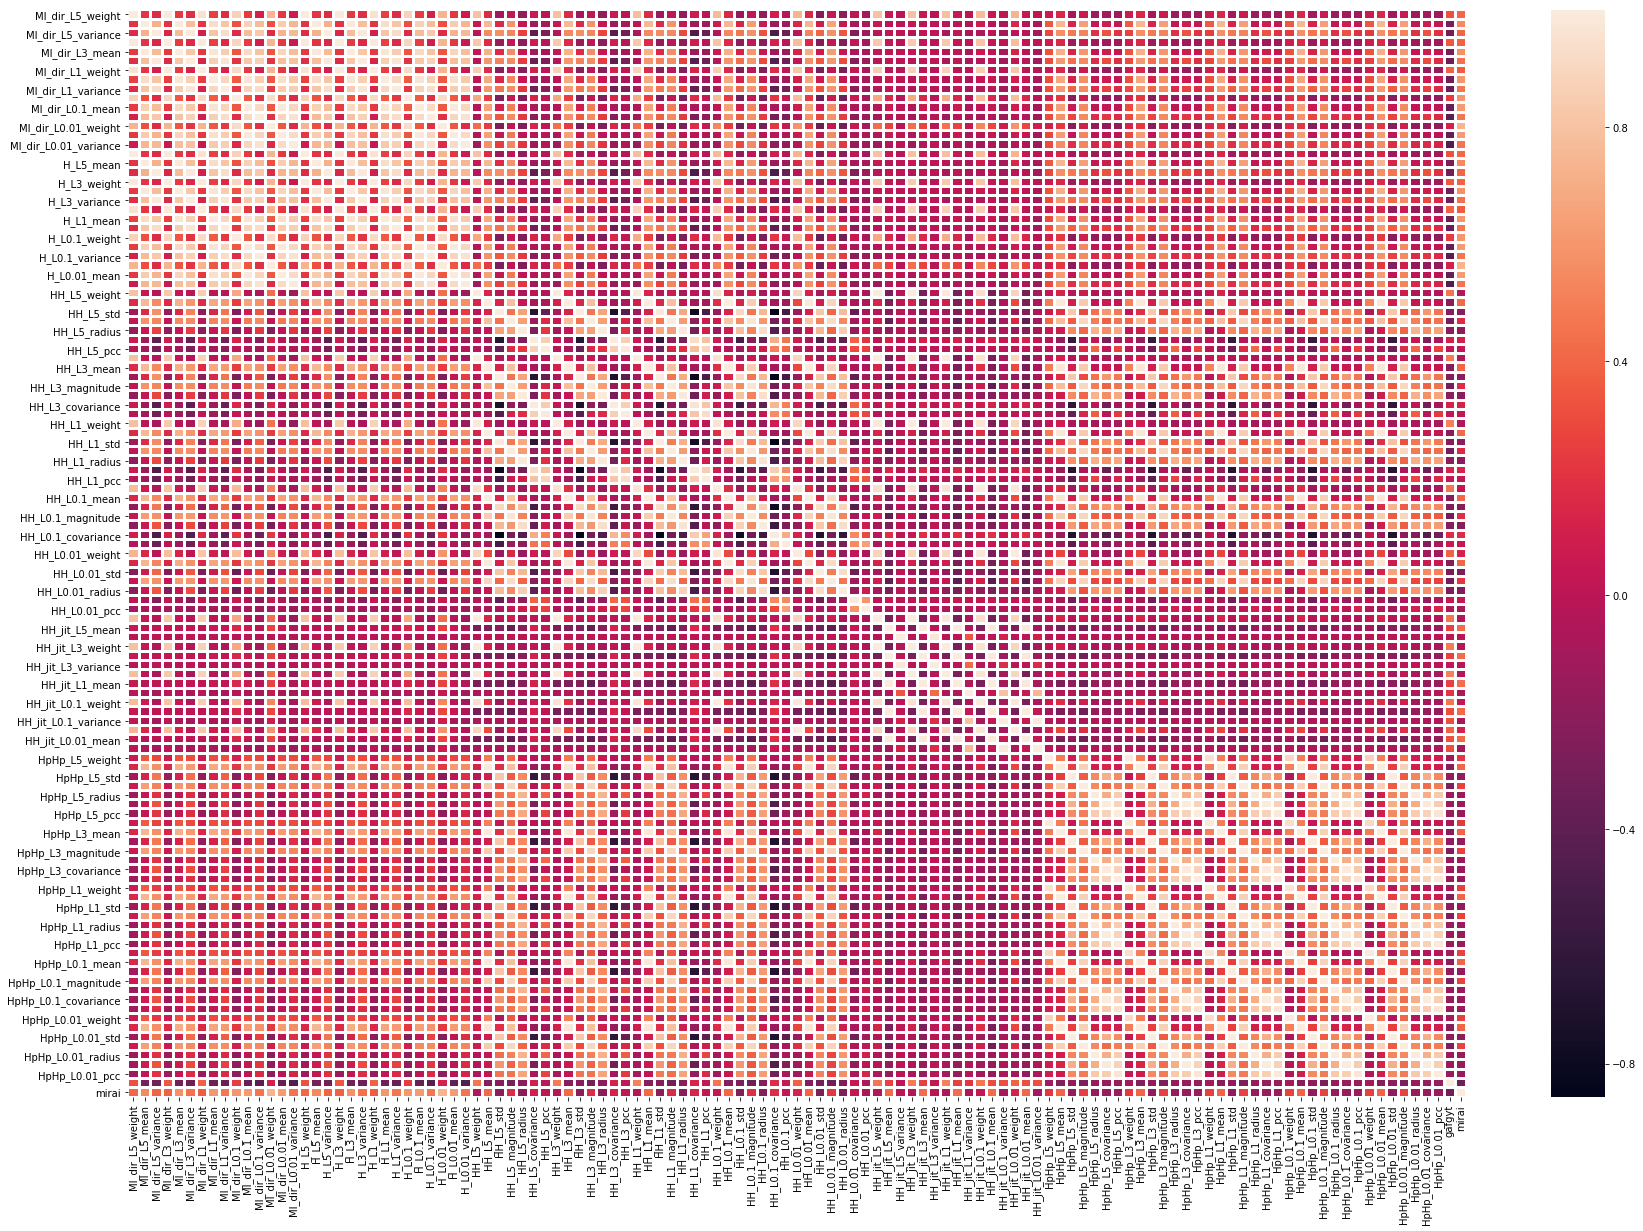

In [26]:
plt.figure(figsize=(30,20))
sns.heatmap(result.corr(), annot = False, linewidths=2)
plt.show()